In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Explorative Datenanalyse

In [2]:
mean_league_team = pd.read_csv('mean_league_teamv1.csv')

In [3]:
mean_league_team.head()

,year,team_placement,age,height,weight
0,2003,1,40.515152,1.831212,74.848485
1,2003,2,43.129032,1.815806,76.709677
2,2003,3,40.000000,1.813590,78.256410
3,2003,4,40.605263,1.828684,75.540541
4,2003,5,41.000000,1.799615,74.000000


In [5]:
# Auswertung in Prozent Null Wert von der Tabelle
(mean_league_team.isna().sum() / len(mean_league_team)*100).sort_values(ascending=True)


year              0.0
team_placement    0.0
age               0.0
height            0.0
weight            0.0
dtype: float64

### 1.1.Boxplot  Zwischenergebnisse:

- Die Median der Spalte age von den ersten platzierten Mannschaften in allen Meisterschfaten beträgt 34 Jaqhre.
- Die meisten Mannschfaten tendieren zu einen ähnliche  Median.
- Die Features height und weight streuen mehr als die Feature age


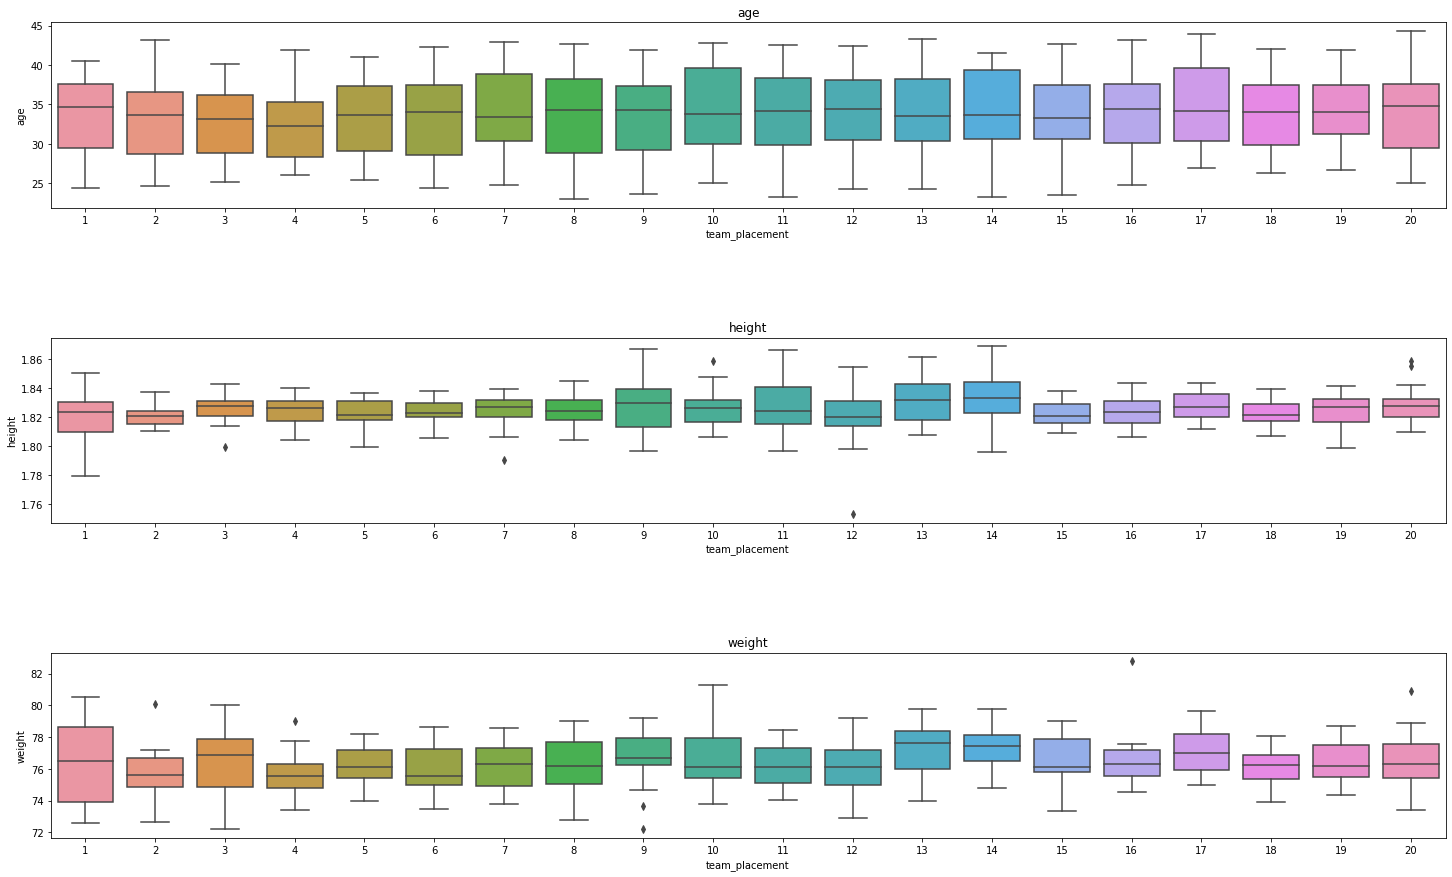

In [45]:
fig, axs = plt.subplots(3,1, figsize=(25, 15), sharey=False)
fig.subplots_adjust(hspace=.7, wspace=0.2)

i = 0
for j,c in enumerate(median_league_team.columns):
  if c not in ['team_placement','year']:
      #ax = fig.add_subplot(3, 2, i)
      sns.boxplot(x='team_placement',y=c,data=median_league_team,ax=axs[i])
      axs[i].set_title(c)
      i += 1

### 1.2 Histogramm

- Features height und weight haben eine normal Verteilung

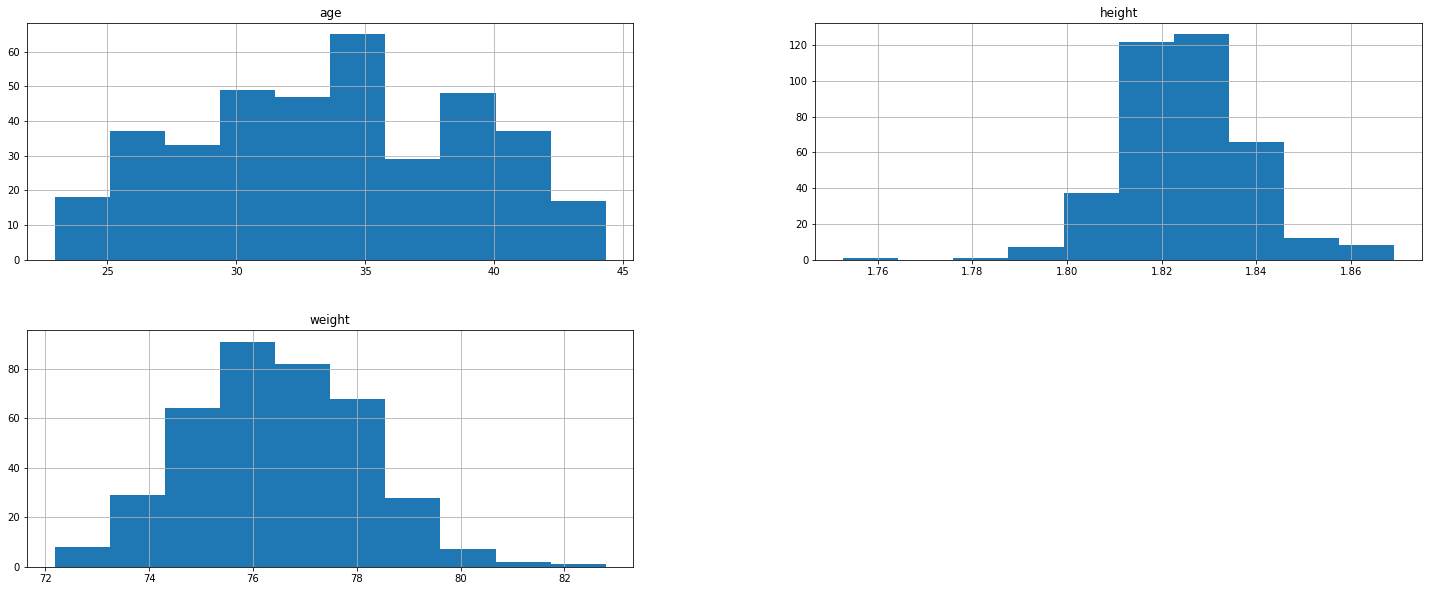

In [47]:
median_league_team.drop(columns=['year','team_placement']).hist(figsize=(25,10))
plt.show()

## 1.3 Scatter 

-  Es gibt einen Linearkombination zwischen die Features year und age
-  Mit den Jahren werden die Spieler durchschnitt immer junger

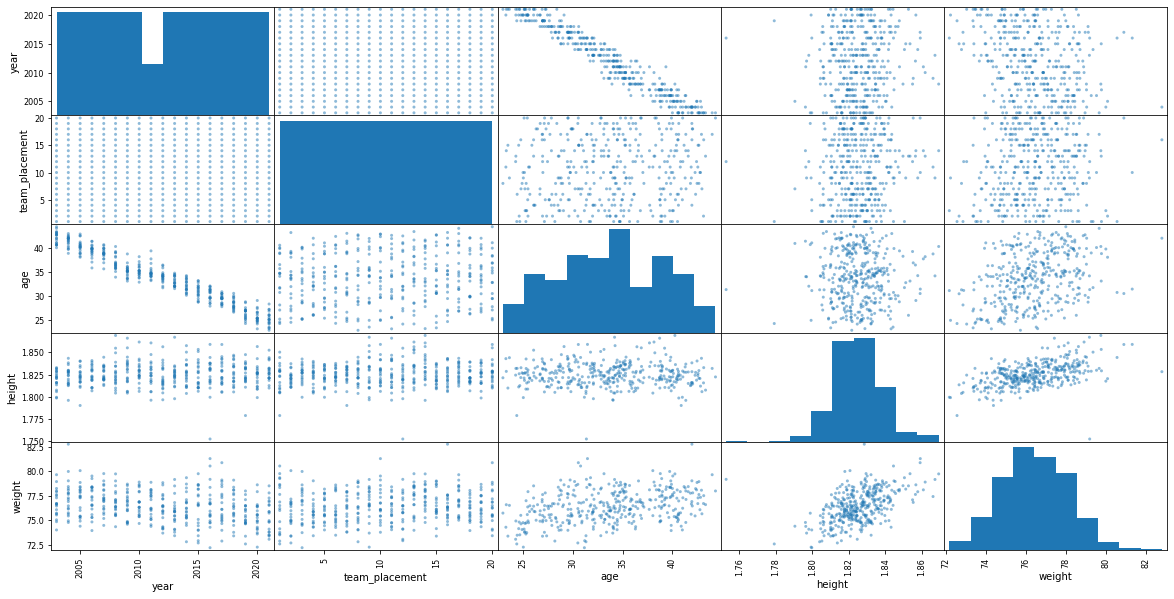

In [48]:
#sns.pairplot(df_frota[colunas_numericas] ) pairplot 
pd.plotting.scatter_matrix(mean_league_team, figsize=(20,10))
plt.show()

## 1.4 Korrelation

- Year und Age haben eine negative Korrelation. Mit der Zeit werden die Spieler jünger
- **Multikollinearität** liegt vor, wenn zwei oder mehr erklärende Variablen eine sehr starke Korrelation miteinander haben. Mit zunehmender Multikollinearität wird in der Regressionsanalyse die Schätzung der Regressionskoeffizienten instabil

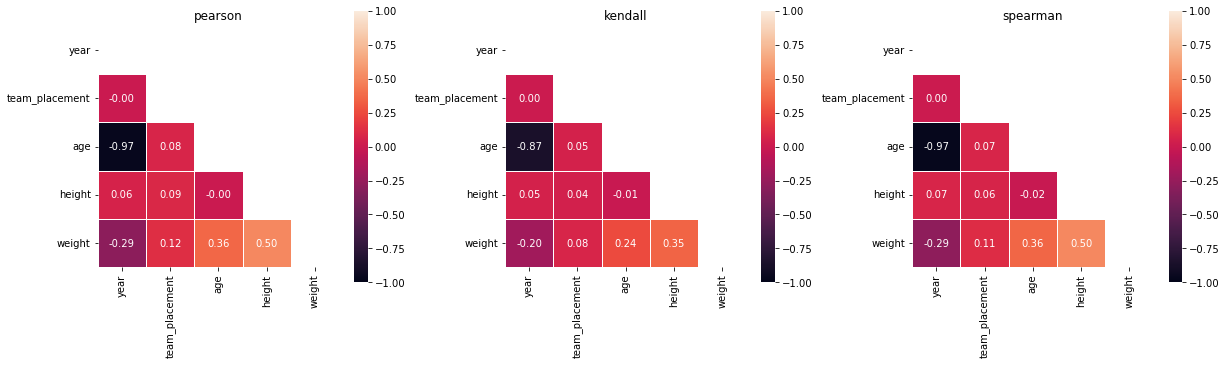

In [49]:
fig, axs = plt.subplots(1,3, figsize=(20, 5), sharey=False)
fig.subplots_adjust(hspace=.7, wspace=0.35)

corr     = median_league_team.corr()
kendall  = median_league_team.corr('kendall')
spearman = median_league_team.corr('spearman')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[0])
sns.heatmap(kendall, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[1])
sns.heatmap(spearman, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[2])

axs[0].set_title("pearson")
axs[1].set_title("kendall")
axs[2].set_title("spearman")

#axs[0].set_xticklabels(axs[0].get_xticks(), rotation = 45)
#axs[1].set_xticklabels(axs[1].get_xticks(), rotation = 45)
#axs[2].set_xticklabels(axs[2].get_xticks(), rotation = 45)

plt.show()